# Сборный проект для интернет-магазина "Стримчик"



Проект для интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.<br>
Предоставлены данные до 2016 года, мы планируем кампанию на 2017-й. 

<b>План работы</b>
<ul>
 <li>Общая информация</li>
 <li>Подготовка данных</li>
 <li>Исследовательский анализ данных</li>
 <li>Портрет пользователя каждого региона</li>
 <li>Проверка гипотез</li>
 <li>Общий вывод</li>   
</ul>


## Шаг 1_Общая информация 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats as st

In [2]:
data = pd.read_csv('/datasets/games.csv')
data.head(15)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Изучили общую информацию о данных, имеется очень много пропусков в столбцах с оценками пользователей и критиков, а ткже рейтинга игр, необходимо будет изменить типы данных в столбцах:Year_of_Release, User_Score, Platform, Genre, Rating 

## Шаг 2_Подготовка данных 

Изменяем наименования столбцов

In [4]:
data.columns = ['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'] 


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
year_of_release,16446.0,2006.484616,5.877050,1980.0,2003.0,2007.00,2010.00,2016.00
na_sales,16715.0,0.263377,0.813604,0.0,0.0,0.08,0.24,41.36
eu_sales,16715.0,0.145060,0.503339,0.0,0.0,0.02,0.11,28.96
jp_sales,16715.0,0.077617,0.308853,0.0,0.0,0.00,0.04,10.22
other_sales,16715.0,0.047342,0.186731,0.0,0.0,0.01,0.03,10.57
critic_score,8137.0,68.967679,13.938165,13.0,60.0,71.00,79.00,98.00


In [6]:
data.nunique()

name               11559
platform              31
year_of_release       37
genre                 12
na_sales             402
eu_sales             307
jp_sales             244
other_sales          155
critic_score          82
user_score            96
rating                 8
dtype: int64

In [7]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Проверка на явные дубликаты

In [8]:
data.duplicated().sum()

0

Есть две строки, где отсутствует имя игры, эти данные не восстановить, удалим данные строки

In [9]:
data = data.dropna(axis='index', how='any', subset=['name'])
data.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

Добавляем столбец с суммой продаж по всем странам

In [10]:
data['all_sales'] = data['na_sales']+data['eu_sales']+data['jp_sales']+data['other_sales']

data.head(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31


In [11]:
data['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [12]:
data['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [13]:
data['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

Изменяем формат данных в некоторых столбцах, год выпуска в формат даты, оценку пользователя в числовые значения

In [14]:
data['year_of_release'] = pd.to_datetime(data['year_of_release'], format='%Y')
data['year_of_release'] = pd.DatetimeIndex(data['year_of_release']).year
data.head(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31


In [15]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = 0

In [16]:
data['user_score'] = data['user_score'].fillna(0)
data.head(15)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,0,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,0,NaN,31.38
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,0,NaN,30.26
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,0,NaN,28.31


In [17]:
data['user_score'] = data['user_score'].astype('float64')

In [18]:
data = data[pd.notnull(data['year_of_release'])]

In [19]:
data['year_of_release'] = data['year_of_release'].astype('int64')

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       16444 non-null  float64
 10  rating           9768 non-null   object 
 11  all_sales        16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


In [21]:
data['rating'] = data['rating'].fillna('unknown')
data.head(15)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,0.0,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,0.0,unknown,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,0.0,unknown,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,0.0,unknown,28.31


In [22]:
data['critic_score'] = data['critic_score'].fillna(0)

<ul>
 <li>Заменили названия столбцов (привели к нижнему регистру)</li>
 <li>Преобразовали данные в нужные типы</li>
 <li>Обработали пропуски</li>
 <li>Посчитали суммарные продажи во всех регионах и записали их в отдельный столбец</li>
</ul>


## Шаг 3_Исследовательский анализ данных 

In [23]:
warnings.simplefilter('ignore')

Рассмотрим распределение данных по платформам, у нас два явных лидера: DS Nintendo и PlayStation 2, необходимо отметить, что DS это портативная игровая система (выпускалась с 2004 года). В свою очередь PlayStation 2 стала наиболее быстро продаваемой и самой популярной игровой консолью в истории. На третий квартал 2011 года в мире продано почти 155 миллионов экземпляров PS2, выпускалась почти 13 лет с 2000 по 2013 года.

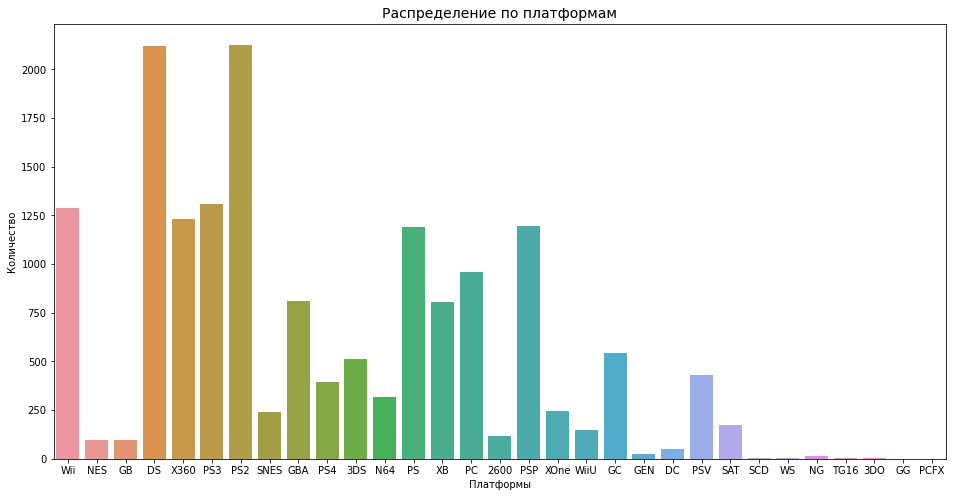

In [24]:
plt.figure(figsize=(16, 8))
sns.countplot(data['platform'])
plt.title('Распределение по платформам', fontsize=14)
plt.xlabel('Платформы')
plt.ylabel('Количество');

<div class="alert alert-info"><b>Комментарий студента:</b> На графике видна высокая популярность игровых систем от компании Sony, 
    из семейства PlayStation. Также в лидерах игровые системы от компании Nintendo, игровые консоли Xbox, Game Boy.
    Игровая консоль PlayStation 2 является самой успешной в истории, наш график это подтверждает.
    </div>

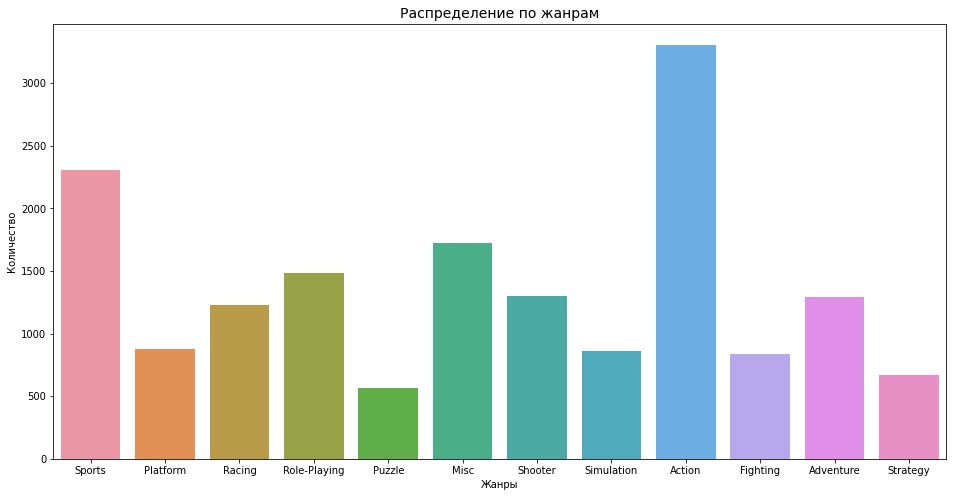

In [25]:
plt.figure(figsize=(16, 8))
sns.countplot(data['genre'])
plt.title('Распределение по жанрам', fontsize=14)
plt.xlabel('Жанры')
plt.ylabel('Количество');

<div class="alert alert-info"><b>Комментарий студента:</b> При рассмотрении распределения по жанрам, мы видим, что топ-5: 
        с боьшим отрывом лидируют игры в жанре Action, далее Sports, на третьем месте Misc, Role-Playing и неожиданно, только на пятом месте по популярности игра в жанре Shooter. </div>

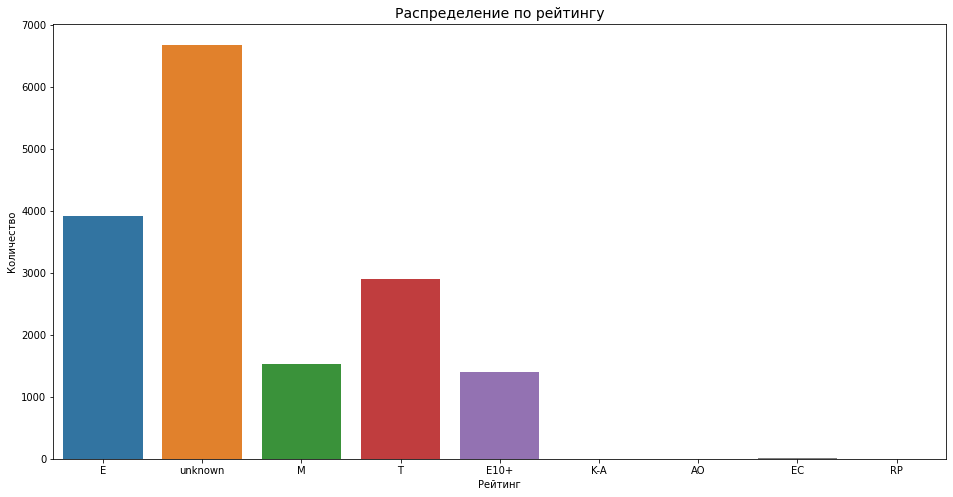

In [26]:
plt.figure(figsize=(16, 8))
sns.countplot(data['rating'])
plt.title('Распределение по рейтингу', fontsize=14)
plt.xlabel('Рейтинг')
plt.ylabel('Количество');

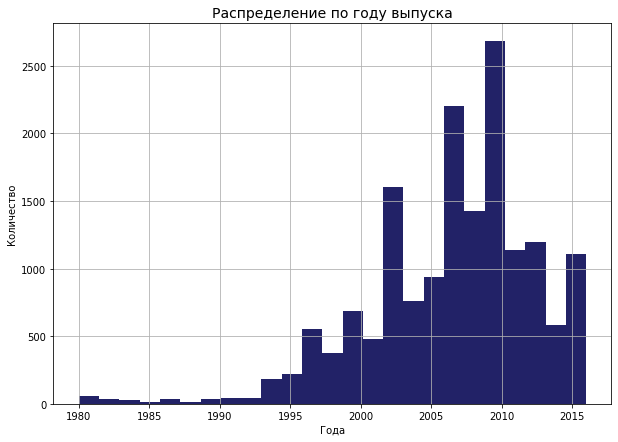

In [27]:
data['year_of_release'].hist(bins=25, color='#222267', figsize=(10,7))
plt.title('Распределение по году выпуска', fontsize=14)
plt.xlabel('Года')
plt.ylabel('Количество');


<div class="alert alert-info"><b>Комментарий студента:</b> В начале 2000-х начинается активный рост выпускаемых игр, в это время на рынок игровых систем
    выходит Microsoft со своим Xbox, ранее весь рынок игровых систем возглавляли компании из Японии. Пиковых значений в количестве выпускаемыхтигр рынок выходит в 2009-2010 годах.  </div>

Рассмотрим объемы продаж по регионам и в целом в разрезе платформ, жанров, годов выпуска и рейтинга:

In [28]:
data_pivot=data.pivot_table(index=['platform'], values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'all_sales'], aggfunc=['count', 'sum', 'mean', 'median'])
data_pivot

count                                              sum           \
         all_sales eu_sales jp_sales na_sales other_sales all_sales eu_sales   
platform                                                                       
2600           116      116      116      116         116     86.48     4.86   
3DO              3        3        3        3           3      0.10     0.00   
3DS            512      512      512      512         512    257.81    61.27   
DC              52       52       52       52          52     15.95     1.69   
DS            2121     2121     2121     2121        2121    802.78   188.41   
GB              97       97       97       97          97    254.43    47.51   
GBA            811      811      811      811         811    312.88    74.59   
GC             542      542      542      542         542    196.73    38.32   
GEN             27       27       27       27          27     28.35     5.52   
GG               1        1        1        1           1      0.04     0.00   
N64            316      316      316      316         316    218.01    41.03   
NES             98       98       98       98          98    251.05    21.15   
NG              12       12       12       12          12      1.44     0.00   
PC             957      957      957      957         957    255.76   140.37   
PCFX             1        1        1        1           1      0.03     0.00   
PS            1190     1190     1190     1190        1190    727.58   212.39   
PS2           2127     2127     2127     2127        2127   1233.56   332.63   
PS3           1306     1306     1306     1306        1306    931.34   327.21   
PS4            392      392      392      392         392    314.14   141.09   
PSP           1193     1193     1193     1193        1193    289.53    65.62   
PSV            429      429      429      429         429     53.81    13.07   
SAT            173      173      173      173         173     33.59     0.54   
SCD              6        6        6        6           6      1.86     0.36   
SNES           239      239      239      239         239    200.04    19.04   
TG16             2        2        2        2           2      0.16     0.00   
WS               6        6        6        6           6      1.42     0.00   
Wii           1286     1286     1286     1286        1286    891.18   258.32   
WiiU           147      147      147      147         147     82.19    25.13   
X360          1232     1232     1232     1232        1232    961.24   268.32   
XB             803      803      803      803         803    251.57    59.65   
XOne           247      247      247      247         247    159.32    51.59   

                                            mean                      \
         jp_sales na_sales other_sales all_sales  eu_sales  jp_sales   
platform                                                               
2600         0.00    80.78        0.84  0.745517  0.041897  0.000000   
3DO          0.10     0.00        0.00  0.033333  0.000000  0.033333   
3DS        100.62    82.65       13.27  0.503535  0.119668  0.196523   
DC           8.56     5.43        0.27  0.306731  0.032500  0.164615   
DS         175.02   380.31       59.04  0.378491  0.088831  0.082518   
GB          85.12   113.64        8.16  2.622990  0.489794  0.877526   
GBA         46.56   184.12        7.61  0.385795  0.091973  0.057411   
GC          21.34   131.94        5.13  0.362970  0.070701  0.039373   
GEN          2.67    19.27        0.89  1.050000  0.204444  0.098889   
GG           0.04     0.00        0.00  0.040000  0.000000  0.040000   
N64         33.76   138.91        4.31  0.689905  0.129842  0.106835   
NES         98.65   125.94        5.31  2.561735  0.215816  1.006633   
NG           1.44     0.00        0.00  0.120000  0.000000  0.120000   
PC           0.17    93.34       21.88  0.267252  0.146677  0.000178   
PCFX         0.03     0.00        0.00  0.030000  0.000000  0.030000

In [29]:
data_pivot=data.pivot_table(index=['genre'], values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'all_sales'], aggfunc=['count', 'sum', 'mean', 'median'])
data_pivot

count                                              sum  \
             all_sales eu_sales jp_sales na_sales other_sales all_sales   
genre                                                                     
Action            3307     3307     3307     3307        3307   1716.52   
Adventure         1293     1293     1293     1293        1293    233.33   
Fighting           837      837      837      837         837    442.66   
Misc              1721     1721     1721     1721        1721    790.29   
Platform           878      878      878      878         878    825.55   
Puzzle             569      569      569      569         569    239.89   
Racing            1226     1226     1226     1226        1226    723.49   
Role-Playing      1481     1481     1481     1481        1481    931.08   
Shooter           1296     1296     1296     1296        1296   1041.36   
Simulation         857      857      857      857         857    387.96   
Sports            2306     2306     2306     2306        2306   1309.67   
Strategy           673      673      673      673         673    172.57   

                                                         mean            \
             eu_sales jp_sales na_sales other_sales all_sales  eu_sales   
genre                                                                     
Action         510.99   160.14   863.17      182.22  0.519057  0.154518   
Adventure       63.20    52.24   101.52       16.37  0.180456  0.048879   
Fighting        99.00    87.28   220.51       35.87  0.528865  0.118280   
Misc           210.60   107.02   399.57       73.10  0.459204  0.122371   
Platform       199.39   130.71   444.44       51.01  0.940262  0.227096   
Puzzle          49.78    56.68   121.13       12.30  0.421599  0.087487   
Racing         234.49    56.63   356.86       75.51  0.590122  0.191264   
Role-Playing   188.24   353.39   330.04       59.41  0.628683  0.127103   
Shooter        314.52    38.68   584.83      103.33  0.803519  0.242685   
Simulation     113.35    63.64   180.40       30.57  0.452695  0.132264   
Sports         371.33   134.93   671.20      132.21  0.567940  0.161028   
Strategy        44.79    49.30    67.75       10.73  0.256419  0.066553   

                                                median                    \
              jp_sales  na_sales other_sales all_sales eu_sales jp_sales   
genre                                                                      
Action        0.048425  0.261013    0.055101      0.19     0.03     0.00   
Adventure     0.040402  0.078515    0.012660      0.05     0.00     0.01   
Fighting      0.104277  0.263453    0.042855      0.21     0.02     0.02   
Misc          0.062185  0.232173    0.042475      0.16     0.01     0.00   
Platform      0.148872  0.506196    0.058098      0.27     0.05     0.00   
Puzzle        0.099613  0.212882    0.021617      0.10     0.01     0.00   
Racing        0.046191  0.291077    0.061591      0.19     0.04     0.00   
Role-Playing  0.238616  0.222849    0.040115      0.18     0.01     0.05   
Shooter       0.029846  0.451258    0.079730      0.24     0.05     0.00   
Simulation    0.074259  0.210502    0.035671      0.15     0.01     0.00   
Sports        0.058513  0.291067    0.057333      0.22     0.02     0.00   
Strategy      0.073254  0.100669    0.015944      0.10     0.01     0.00   

                                   
             na_sales other_sales  
genre                              
Action           0.10        0.01  
Adventure        0.00        0.00  
Fighting         0.08        0.01  
Misc             0.08        0.01  
Platform         0.14        0.01  
Puzzle           0.05        0.01  
Racing           0.10        0.01  
Role-Playing     0.04        0.01  
Shooter          0.12        0.02  
Simulation       0.07        0.01  
Sports           0.11        0.01  
Strategy         0.00        0.00

In [30]:
data_pivot=data.pivot_table(index=['year_of_release'], values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], aggfunc=['count', 'sum','mean', 'median'])
data_pivot

count                                    sum           \
                eu_sales jp_sales na_sales other_sales eu_sales jp_sales   
year_of_release                                                            
1980                   9        9        9           9     0.67     0.00   
1981                  46       46       46          46     1.96     0.00   
1982                  36       36       36          36     1.65     0.00   
1983                  17       17       17          17     0.80     8.10   
1984                  14       14       14          14     2.10    14.27   
1985                  14       14       14          14     4.74    14.56   
1986                  21       21       21          21     2.84    19.81   
1987                  16       16       16          16     1.41    11.63   
1988                  15       15       15          15     6.59    15.76   
1989                  17       17       17          17     8.44    18.36   
1990                  16       16       16          16     7.63    14.88   
1991                  41       41       41          41     3.95    14.78   
1992                  43       43       43          43    11.71    28.91   
1993                  60       60       60          60     4.65    25.33   
1994                 121      121      121         121    14.88    33.99   
1995                 219      219      219         219    14.90    45.75   
1996                 263      263      263         263    47.26    57.44   
1997                 289      289      289         289    48.32    48.87   
1998                 379      379      379         379    66.90    50.04   
1999                 338      338      338         338    62.67    52.34   
2000                 350      350      350         350    52.77    42.77   
2001                 482      482      482         482    94.89    39.86   
2002                 829      829      829         829   109.75    41.76   
2003                 775      775      775         775   103.81    34.20   
2004                 762      762      762         762   107.28    41.65   
2005                 939      939      939         939   121.11    54.27   
2006                1006     1006     1006        1006   127.89    73.74   
2007                1197     1197     1197        1197   157.82    60.29   
2008                1427     1427     1427        1427   181.14    60.25   
2009                1426     1426     1426        1426   187.94    61.89   
2010                1255     1255     1255        1255   171.42    59.49   
2011                1136     1136     1136        1136   162.97    53.07   
2012                 653      653      653         653   114.59    51.80   
2013                 544      544      544         544   121.55    47.69   
2014                 581      581      581         581   122.74    39.69   
2015                 606      606      606         606    96.72    34.09   
2016                 502      502      502         502    51.22    19.31   

                                          mean                      \
                na_sales other_sales  eu_sales  jp_sales  na_sales   
year_of_release                                                      
1980               10.59        0.12  0.074444  0.000000  1.176667   
1981               33.40        0.32  0.042609  0.000000  0.726087   
1982               26.92        0.31  0.045833  0.000000  0.747778   
1983                7.76        0.14  0.047059  0.476471  0.456471   
1984               33.28        0.70  0.150000  1.019286  2.377143   
1985               33.73        0.92  0.338571  1.040000  2.409286   
1986               12.50        1.93  0.135238  0.943333  0.595238   
1987                8.46        0.20  0.088125  0.726875  0.528750   
1988               23.87        0.99  0.439333  1.050667  1.591333   
1989               45.15        1.50  0.496471  1.080000  2.655882   
1990               25.46        1.40  0.476875  0.930000  1.591250  

In [31]:
data_pivot=data.pivot_table(index=['rating'], values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'all_sales'], aggfunc=['count', 'sum', 'mean', 'median'])
data_pivot

count                                              sum           \
        all_sales eu_sales jp_sales na_sales other_sales all_sales eu_sales   
rating                                                                        
AO              1        1        1        1           1      1.96     0.61   
E            3921     3921     3921     3921        3921   2407.61   703.87   
E10+         1393     1393     1393     1393        1393    640.98   183.35   
EC              8        8        8        8           8      1.75     0.11   
K-A             3        3        3        3           3      4.32     0.27   
M            1536     1536     1536     1536        1536   1462.53   480.00   
RP              1        1        1        1           1      0.04     0.03   
T            2905     2905     2905     2905        2905   1473.08   421.79   
unknown      6676     6676     6676     6676        6676   2822.10   609.65   

                                           mean                                \
        jp_sales na_sales other_sales all_sales  eu_sales  jp_sales  na_sales   
rating                                                                          
AO          0.00     1.26        0.09  1.960000  0.610000  0.000000  1.260000   
E         197.96  1274.24      231.54  0.614030  0.179513  0.050487  0.324978   
E10+       40.20   345.50       71.93  0.460144  0.131622  0.028859  0.248026   
EC          0.00     1.53        0.11  0.218750  0.013750  0.000000  0.191250   
K-A         1.46     2.56        0.03  1.440000  0.090000  0.486667  0.853333   
M          63.58   742.89      176.06  0.952168  0.312500  0.041393  0.483652   
RP          0.00     0.00        0.01  0.040000  0.030000  0.000000  0.000000   
T         150.70   747.60      152.99  0.507084  0.145194  0.051876  0.257349   
unknown   836.74  1225.84      149.87  0.422723  0.091320  0.125336  0.183619   

                       median                                         
        other_sales all_sales eu_sales jp_sales na_sales other_sales  
rating                                                                
AO         0.090000      1.96     0.61     0.00    1.260       0.090  
E          0.059051      0.20     0.03     0.00    0.120       0.010  
E10+       0.051637      0.20     0.03     0.00    0.120       0.020  
EC         0.013750      0.22     0.00     0.00    0.155       0.015  
K-A        0.010000      1.91     0.10     0.00    0.260       0.000  
M          0.114622      0.31     0.09     0.00    0.140       0.030  
RP         0.010000      0.04     0.03     0.00    0.000       0.010  
T          0.052664      0.20     0.04     0.00    0.110       0.020  
unknown    0.022449      0.11     0.00     0.02    0.000       0.000

Игровые консоли вы пускаются одними и теми же производителями и обновляются с течением времени, чтобы рассмотреть глобально ведущие марки игровых систем, сгруппируем данные по производителям и создадим отдельный столбец:

In [32]:
nintendo = ['Wii', 'NES', 'DS', 'SNES', '3DS', 'N64', 'WiiU', 'GC', 'SCD']
play_station = ['PS', 'PS2', 'PS3', 'PS4', 'PSP', 'PSV']
xbox = ['X360', 'XB', 'XOne']
nec = ['TG16', 'PCFX', 'PC']
sega = ['GG', 'GEN', 'DC', 'SAT']
game_boy = ['GB', 'GBA']
atari = ['2600']
wonder_swan = ['WS']
neo_geo = ['NG']
panasonic = ['3DO']

In [33]:
def categorize_platform(row):
    try:
        if 'Wii'in row or 'NES'in row or 'DS'in row or 'SNES'in row or '3DS'in row or 'N64'in row or 'WiiU'in row or 'GC'in row or 'SCD' in row:
            return 'nintendo'
        elif 'PS'in row or 'PS2'in row or 'PS3'in row or 'PS4'in row or 'PSP'in row or 'PSV' in row:
            return 'play_station'
        elif 'X360'in row or 'XB'in row or 'XOne' in row:
            return 'xbox'
        elif 'TG16'in row or 'PCFX'in row or 'PC' in row:
            return 'nec'
        elif 'GG'in row or 'GEN'in row or 'DC'in row or 'SAT' in row:
            return 'sega'
        elif 'GB'in row or 'GBA' in row:
            return 'nec'
    
    except:
        return 'other'

In [34]:
data['platform_category'] = data['platform'].apply(categorize_platform)

In [35]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales,platform_category
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54,nintendo
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.0,0.0,unknown,40.24,nintendo
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52,nintendo
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77,nintendo
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,unknown,31.38,nec


У нас обозначилась тройка лидеров, это игровые консоли от компании Sony (PlayStation), Nintendo, Microsoft (Xbox).

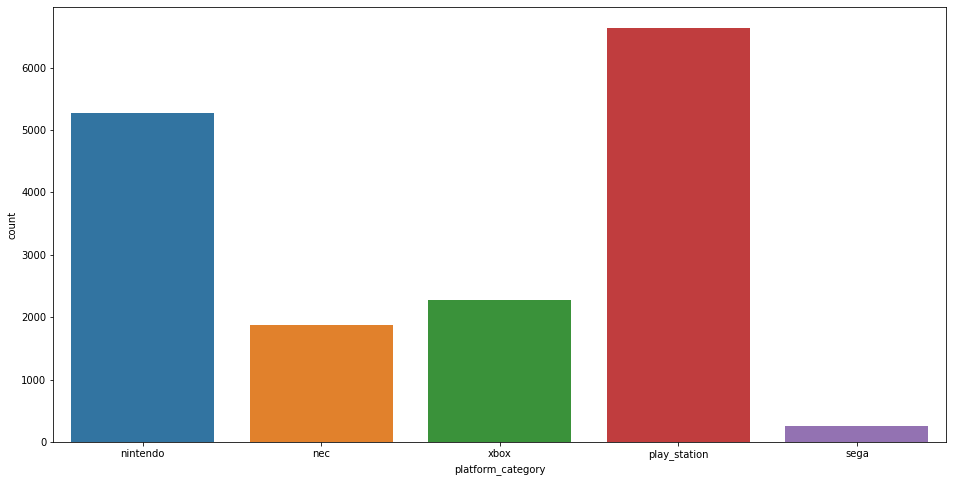

In [36]:
plt.figure(figsize=(16, 8))
sns.countplot(data['platform_category']);

In [37]:
data_xb_ps = data[data['platform_category'].isin(['play_station', 'xbox'])]
data_xb_ps.head(15) 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales,platform_category
14,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,21.82,xbox
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05,play_station
17,Grand Theft Auto: San Andreas,PS2,2004,Action,9.43,0.40,0.41,10.57,95.0,9.0,M,20.81,play_station
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27,xbox
24,Grand Theft Auto: Vice City,PS2,2002,Action,8.41,5.49,0.47,1.78,95.0,8.7,M,16.15,play_station
28,Gran Turismo 3: A-Spec,PS2,2001,Racing,6.85,5.09,1.87,1.16,95.0,8.4,E,14.97,play_station
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73,xbox
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,0.0,0.0,unknown,14.63,play_station
32,Call of Duty: Black Ops,X360,2010,Shooter,9.70,3.68,0.11,1.13,87.0,6.3,M,14.62,xbox
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79,play_station


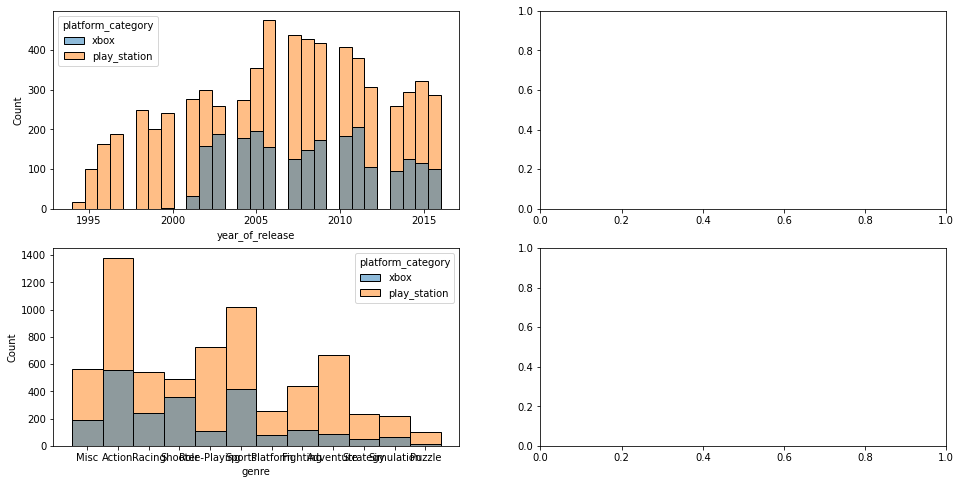

In [38]:
num_cols=['year_of_release', 'genre']
platform_category = 'platform_category'
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(16, 8))
for i, col in enumerate(num_cols):
    ax = axes[int(i/1), i%1]
    sns.histplot(data_xb_ps, x=col, ax=ax, hue=platform_category)

In [39]:
data_pivot=data_xb_ps.pivot_table(index=['platform_category', 'year_of_release'], values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'all_sales'], aggfunc=['sum'])
data_pivot

sum                             \
                                  all_sales eu_sales jp_sales na_sales   
platform_category year_of_release                                        
play_station      1994                 6.03     1.20     2.67     1.76   
                  1995                35.96     9.85     9.54    14.61   
                  1996                94.70    25.92    17.82    45.42   
                  1997               136.17    37.14    33.10    58.06   
                  1998               169.49    48.74    28.48    83.22   
                  1999               144.53    42.60    28.07    65.94   
                  2000               135.54    41.19    23.47    62.02   
                  2001               202.02    66.09    21.65    95.33   
                  2002               212.05    67.16    23.49    99.32   
                  2003               186.38    61.98    18.88    84.69   
                  2004               218.87    57.71    21.20    99.03   
                  2005               204.50    50.57    18.27   110.08   
                  2006               179.70    42.91    23.11    86.81   
                  2007               196.11    50.61    19.82    82.67   
                  2008               206.97    54.33    21.62    90.23   
                  2009               195.11    56.99    19.16    84.63   
                  2010               182.85    57.86    28.74    70.64   
                  2011               179.68    59.43    28.56    68.56   
                  2012               131.24    44.56    21.57    45.95   
                  2013               152.97    56.06    20.05    54.10   
                  2014               159.90    67.19    15.59    53.12   
                  2015               142.09    58.49    14.95    47.75   
                  2016                77.10    33.43    10.60    22.31   
xbox              2000                 0.99     0.21     0.00     0.74   
                  2001                22.26     4.65     0.37    16.61   
                  2002                48.01    11.78     0.49    34.05   
                  2003                55.04    13.49     0.30    39.34   
                  2004                65.42    14.62     0.20    48.47   
                  2005                57.33    12.92     0.30    41.74   
                  2006                61.66    13.09     1.20    42.63   
                  2007                95.96    22.29     1.52    63.40   
                  2008               135.44    38.20     1.89    82.64   
                  2009               120.29    33.31     1.95    74.00   
                  2010               170.03    46.31     2.11   107.38   
                  2011               143.84    42.58     1.78    86.75   
                  2012                99.74    32.00     1.06    58.39   
                  2013               107.54    32.37     0.45    65.21   
                  2014                88.81    29.43     0.22    51.22   
                  2015                72.10    21.97     0.17    43.39   
                  2016                27.67    10.34     0.01    14.96   

                                               
                                  other_sales  
platform_category year_of_release              
play_station      1994                   0.40  
                  1995                   1.96  
                  1996                   5.54  
                  1997                   7.87  
                  1998                   9.05  
                  1999                   7.92  
                  2000                   8.86  
                  2001                  18.95  
                  2002                  22.08  
                  2003                  20.83  
                  2004                  40.93  
                  2005                  25.58  
                  2006                  26.87  
                  2007                  43.01  
                  2008                  4

In [40]:
data_actualy = data.loc[data['year_of_release'] >= 2013]
data_actualy.head(15)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales,platform_category
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05,play_station
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27,xbox
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,0.0,0.0,unknown,14.63,play_station
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,0.0,0.0,unknown,14.60,nintendo
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62,play_station
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,0.0,0.0,unknown,11.68,nintendo
60,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24,xbox
69,Call of Duty: Ghosts,PS3,2013,Shooter,4.10,3.63,0.38,1.25,71.0,2.6,M,9.36,play_station
72,Minecraft,X360,2013,Misc,5.70,2.65,0.02,0.81,0.0,0.0,unknown,9.18,xbox
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58,play_station


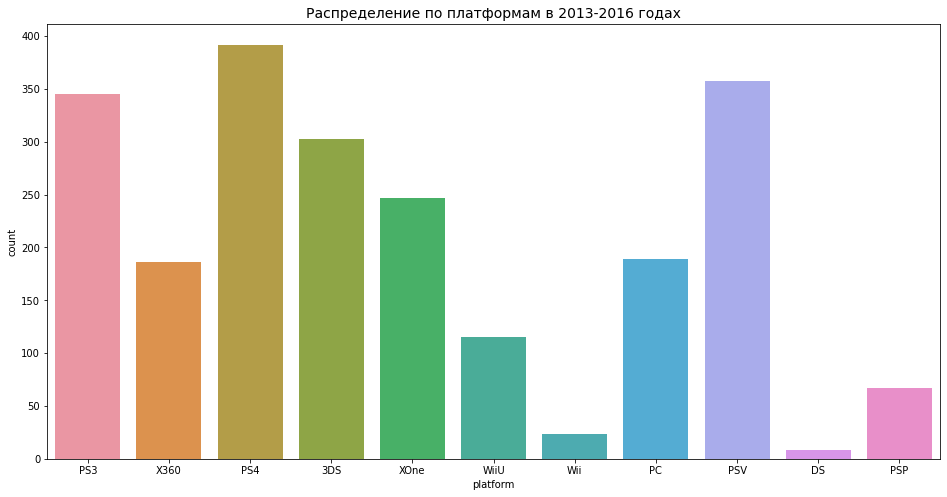

In [41]:
plt.figure(figsize=(16, 8))
sns.countplot(data_actualy['platform'])
plt.title('Распределение по платформам в 2013-2016 годах', fontsize=14);

<div class="alert alert-info"><b>Комментарий студента:</b> За период 2013-2016 годов, ряд платформ ушли с рынка, очень сильно упала популярность игровых систем Nintendo, в свою Xbox стала более популярной.  </div>

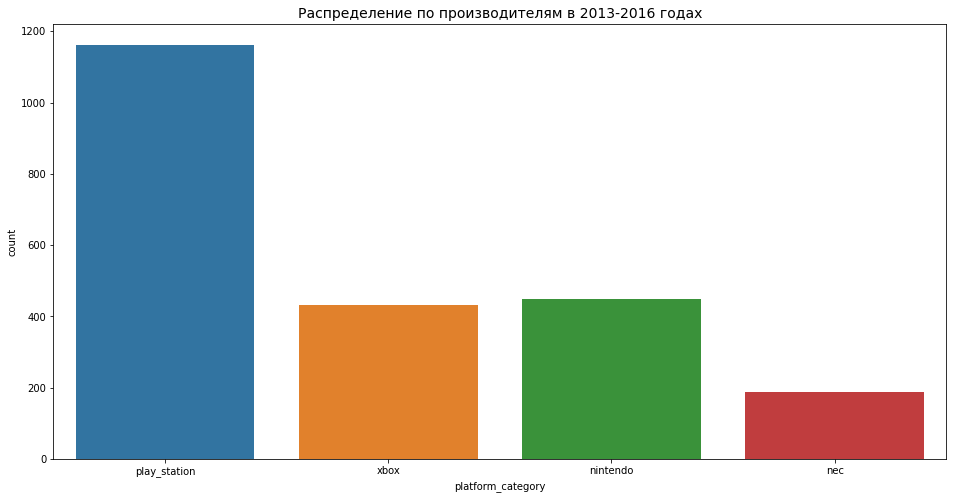

In [42]:
plt.figure(figsize=(16, 8))
sns.countplot(data_actualy['platform_category'])
plt.title('Распределение по производителям в 2013-2016 годах', fontsize=14);

<div class="alert alert-info"><b>Комментарий студента:</b> Если посмотреть в разрезе производителей, мы увидим, что игровые системы Xboxпочти сравнялись по популярности с Nintendo, ну и конечно непревзойденным лидером остается PlayStation.  </div>

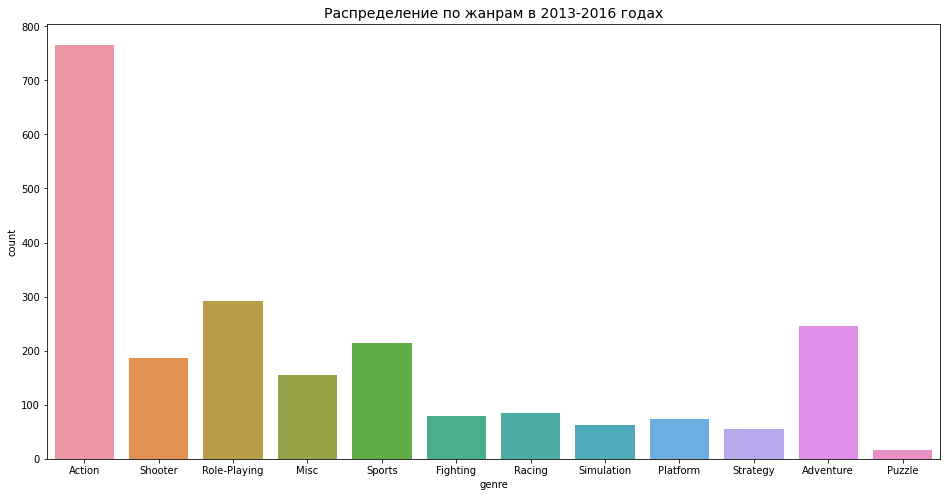

In [43]:
plt.figure(figsize=(16, 8))
sns.countplot(data_actualy['genre'])
plt.title('Распределение по жанрам в 2013-2016 годах', fontsize=14);

In [45]:
data_mean = data_actualy.groupby('genre').agg(all_sales_mean=('all_sales', 'mean')).sort_values(by='all_sales_mean',ascending=False).reset_index()
data_mean

,genre,all_sales_mean
0,Shooter,1.245882
1,Sports,0.703972
2,Platform,0.576081
3,Role-Playing,0.499623
4,Racing,0.469294
5,Fighting,0.441375
6,Action,0.420196
7,Misc,0.405290
8,Simulation,0.350968
9,Puzzle,0.186471


<div class="alert alert-info"><b>Комментарий студента к замечаниям ревьюера в3:</b> При рассмотрении показателей средних и медианных продаж, мы видим, что жанр Action, хоть и лидирует по объемам продаж, но не является самым прибыльным, такой объем достигается количеством выпускаемых игр в этом жанре, например, у лидера по показателям прибыльности Shooter, выпущено почти в четыре раза меньше игр за исследуемый период. Хорошие показатели прибыльности также у жанров Sports и Platform. Можно сделать вывод, что в жанре Shooter выходят игры со стабильно высокими показателями продаж</div>
    

In [46]:
data_pivot_actualy=data_actualy.pivot_table(index=['genre'], values=['all_sales'], aggfunc=['count', 'sum', 'mean', 'median'])
data_pivot_actualy

,count,sum,mean,median
,all_sales,all_sales,all_sales,all_sales
genre,,,,
Action,766,321.87,0.420196,0.110
Adventure,245,23.64,0.096490,0.030
Fighting,80,35.31,0.441375,0.125
Misc,155,62.82,0.405290,0.100
Platform,74,42.63,0.576081,0.225
Puzzle,17,3.17,0.186471,0.060
Racing,85,39.89,0.469294,0.120
Role-Playing,292,145.89,0.499623,0.125


In [47]:
data_xb_ps_actualy = data_xb_ps.loc[data['year_of_release'] >= 2013]
data_actualy.head(15)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales,platform_category
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05,play_station
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27,xbox
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,0.0,0.0,unknown,14.63,play_station
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,0.0,0.0,unknown,14.60,nintendo
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62,play_station
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,0.0,0.0,unknown,11.68,nintendo
60,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24,xbox
69,Call of Duty: Ghosts,PS3,2013,Shooter,4.10,3.63,0.38,1.25,71.0,2.6,M,9.36,play_station
72,Minecraft,X360,2013,Misc,5.70,2.65,0.02,0.81,0.0,0.0,unknown,9.18,xbox
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58,play_station


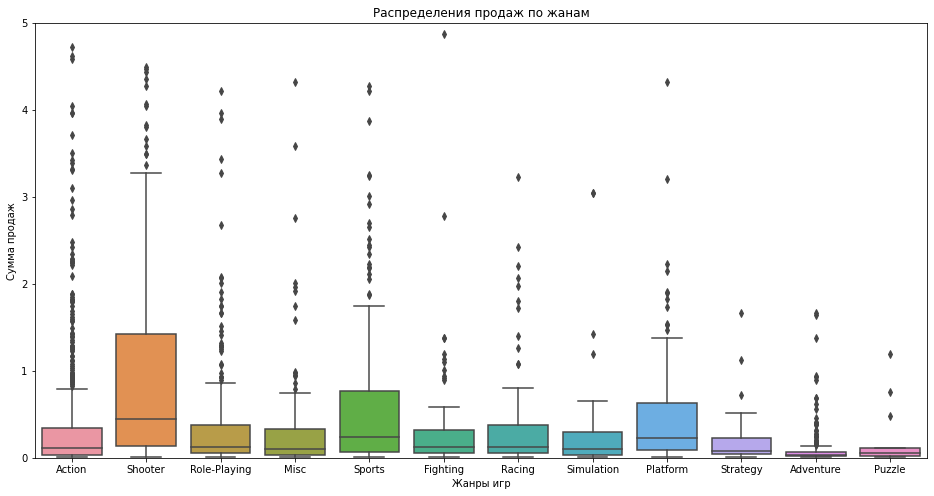

In [48]:
plt.figure(figsize=(16,8))
plt.ylim([0, 5])
(sns.boxplot(data = data_actualy, y = 'all_sales', x = 'genre')
 .set(title = 'Распределения продаж по жанам',
     xlabel = 'Жанры игр',
     ylabel = 'Сумма продаж'));

<div class="alert alert-info"><b>Комментарий студента:</b> При рассмотрении показателей средних и медианных продаж, мы видим, что хоть в жанре Action выпускается очень много игр, но прибыльность у них небольшая, в свою очередь в жанре Shooter самые высокие показатели прибыльности, на втором месте игры в жанре Sports и на третьем Platform </div>

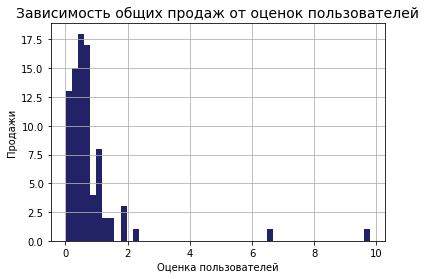

In [49]:
data_pivot_actualy=data_actualy.pivot_table(index=['user_score'], values=['all_sales'])
data_pivot_actualy.hist(bins=50, color='#222267');
plt.title('Зависимость общих продаж от оценок пользователей', fontsize=14)
plt.xlabel('Оценка пользователей')
plt.ylabel('Продажи');


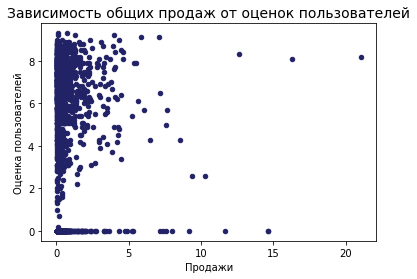

In [50]:
data_actualy.plot.scatter (x = 'all_sales', y = 'user_score', color='#222267')
plt.title('Зависимость общих продаж от оценок пользователей', fontsize=14)
plt.xlabel('Продажи')
plt.ylabel('Оценка пользователей');

<div class="alert alert-info"><b>Комментарий студента:</b> Отсутствует прямая зависимость общих продаж от оценок пользователей, как видно на графике, самые высокие оценки у игр с низкими продажами </div>

In [51]:
data_actualy_user = data_actualy.loc[data['user_score'] != 0]

In [52]:
data_actualy_critic = data_actualy.loc[data['critic_score'] != 0]

In [53]:
data_actualy_ps4 = data_actualy_critic.loc[data['platform'] == 'PS4']
data_actualy_ps4.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales,platform_category
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62,play_station
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58,play_station
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66,play_station
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60,play_station
105,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87.0,6.5,M,7.17,play_station
143,FIFA 15,PS4,2014,Sports,0.80,4.33,0.05,0.90,82.0,5.7,E,6.08,play_station
154,Destiny,PS4,2014,Shooter,2.49,2.07,0.16,0.92,76.0,6.1,T,5.64,play_station
171,Uncharted 4: A Thief's End,PS4,2016,Shooter,1.85,2.50,0.19,0.85,93.0,7.9,T,5.39,play_station
231,Uncharted: The Nathan Drake Collection,PS4,2015,Action,2.07,1.71,0.08,0.76,86.0,8.1,T,4.62,play_station
245,Call of Duty: Infinite Warfare,PS4,2016,Shooter,1.61,2.00,0.15,0.71,77.0,3.4,M,4.47,play_station


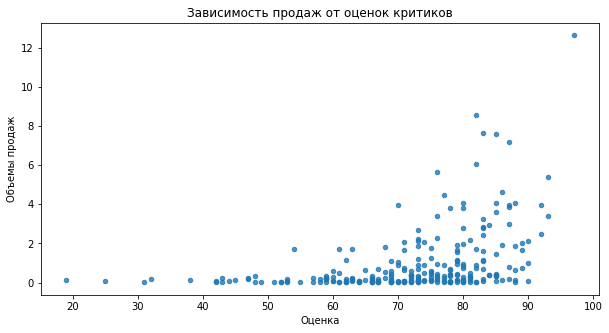

In [54]:
data_actualy_ps4.plot(x='critic_score', y='all_sales', kind = 'scatter', alpha=0.8, figsize=(10,5))
plt.xlabel('Оценка')
plt.ylabel('Объемы продаж')
plt.title('Зависимость продаж от оценок критиков');

In [55]:
data_actualy_ps4[['all_sales', 'critic_score']].corr()

,all_sales,critic_score
all_sales,1.000000,0.406568
critic_score,0.406568,1.000000


In [56]:
data_actualy_ps4_user = data_actualy_user.loc[data['platform'] == 'PS4']
data_actualy_ps4_user.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales,platform_category
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62,play_station
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58,play_station
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66,play_station
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60,play_station
105,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87.0,6.5,M,7.17,play_station
143,FIFA 15,PS4,2014,Sports,0.80,4.33,0.05,0.90,82.0,5.7,E,6.08,play_station
154,Destiny,PS4,2014,Shooter,2.49,2.07,0.16,0.92,76.0,6.1,T,5.64,play_station
171,Uncharted 4: A Thief's End,PS4,2016,Shooter,1.85,2.50,0.19,0.85,93.0,7.9,T,5.39,play_station
231,Uncharted: The Nathan Drake Collection,PS4,2015,Action,2.07,1.71,0.08,0.76,86.0,8.1,T,4.62,play_station
245,Call of Duty: Infinite Warfare,PS4,2016,Shooter,1.61,2.00,0.15,0.71,77.0,3.4,M,4.47,play_station


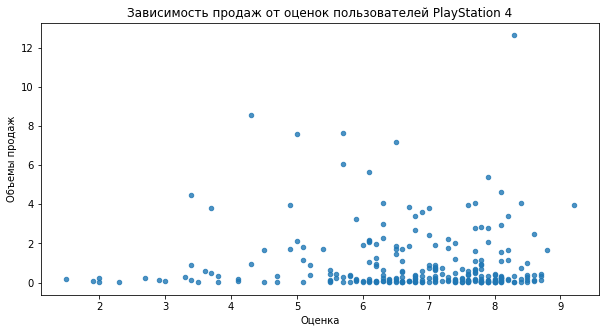

In [57]:
data_actualy_ps4_user.plot(x='user_score', y='all_sales', kind = 'scatter', alpha=0.8, figsize=(10,5))
plt.xlabel('Оценка')
plt.ylabel('Объемы продаж')
plt.title('Зависимость продаж от оценок пользователей PlayStation 4');

In [58]:
data_actualy_ps4_user[['all_sales', 'user_score']].corr()

,all_sales,user_score
all_sales,1.000000,-0.031957
user_score,-0.031957,1.000000


In [59]:
data_actualy_ps3 = data_actualy_critic.loc[data['platform'] == 'PS3']

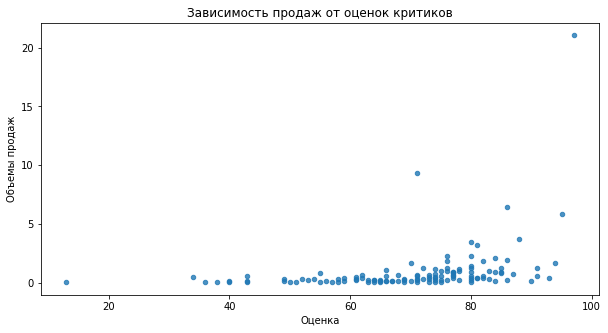

In [60]:
data_actualy_ps3.plot(x='critic_score', y='all_sales', kind = 'scatter', alpha=0.8, figsize=(10,5))
plt.xlabel('Оценка')
plt.ylabel('Объемы продаж')
plt.title('Зависимость продаж от оценок критиков');

In [61]:
data_actualy_ps3[['all_sales', 'critic_score']].corr()

,all_sales,critic_score
all_sales,1.000000,0.334285
critic_score,0.334285,1.000000


In [62]:
data_actualy_ps3_user = data_actualy_user.loc[data['platform'] == 'PS3']

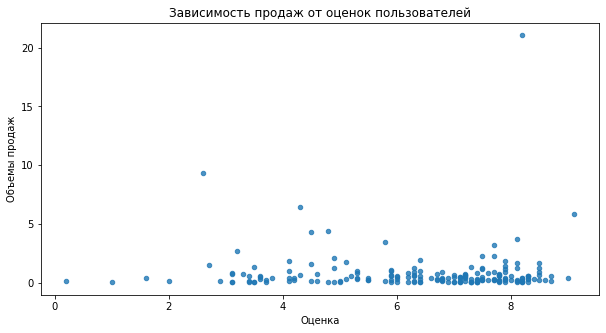

In [63]:
data_actualy_ps3_user.plot(x='user_score', y='all_sales', kind = 'scatter', alpha=0.8, figsize=(10,5))
plt.xlabel('Оценка')
plt.ylabel('Объемы продаж')
plt.title('Зависимость продаж от оценок пользователей');

In [64]:
data_actualy_ps3_user[['all_sales', 'user_score']].corr()

,all_sales,user_score
all_sales,1.000000,0.002394
user_score,0.002394,1.000000


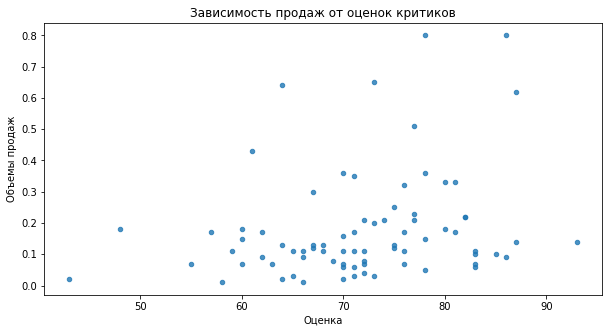

In [65]:
data_actualy_psv = data_actualy_critic.loc[data['platform'] == 'PSV']
data_actualy_psv.plot(x='critic_score', y='all_sales', kind = 'scatter', alpha=0.8, figsize=(10,5))
plt.xlabel('Оценка')
plt.ylabel('Объемы продаж')
plt.title('Зависимость продаж от оценок критиков');

In [66]:
data_actualy_psv[['all_sales', 'critic_score']].corr()

,all_sales,critic_score
all_sales,1.000000,0.254742
critic_score,0.254742,1.000000


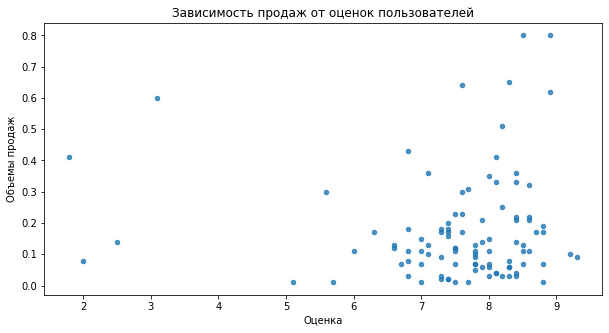

In [67]:
data_actualy_psv_user = data_actualy_user.loc[data['platform'] == 'PSV']
data_actualy_psv_user.plot(x='user_score', y='all_sales', kind = 'scatter', alpha=0.8, figsize=(10,5))
plt.xlabel('Оценка')
plt.ylabel('Объемы продаж')
plt.title('Зависимость продаж от оценок пользователей');

In [68]:
data_actualy_psv_user[['all_sales', 'user_score']].corr()

,all_sales,user_score
all_sales,1.000000,0.000942
user_score,0.000942,1.000000


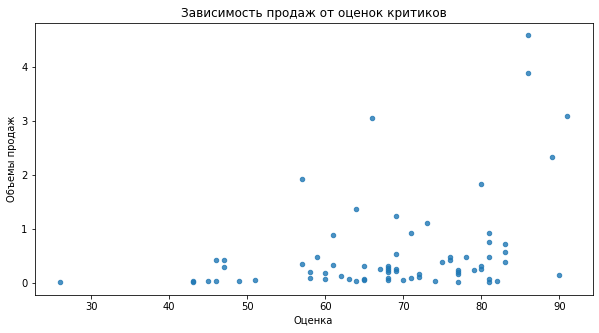

In [69]:
data_actualy_3ds = data_actualy_critic.loc[data['platform'] == '3DS']
data_actualy_3ds.plot(x='critic_score', y='all_sales', kind = 'scatter', alpha=0.8, figsize=(10,5))
plt.xlabel('Оценка')
plt.ylabel('Объемы продаж')
plt.title('Зависимость продаж от оценок критиков');

In [70]:
data_actualy_3ds[['all_sales', 'critic_score']].corr()

,all_sales,critic_score
all_sales,1.000000,0.357057
critic_score,0.357057,1.000000


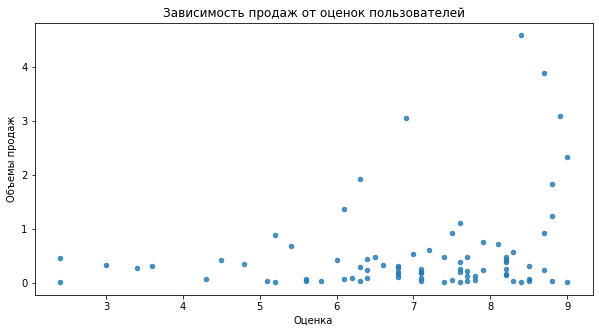

In [71]:
data_actualy_3ds_user = data_actualy_user.loc[data['platform'] == '3DS']
data_actualy_3ds_user.plot(x='user_score', y='all_sales', kind = 'scatter', alpha=0.8, figsize=(10,5))
plt.xlabel('Оценка')
plt.ylabel('Объемы продаж')
plt.title('Зависимость продаж от оценок пользователей');

In [72]:
data_actualy_3ds_user[['all_sales', 'user_score']].corr()

,all_sales,user_score
all_sales,1.000000,0.241504
user_score,0.241504,1.000000


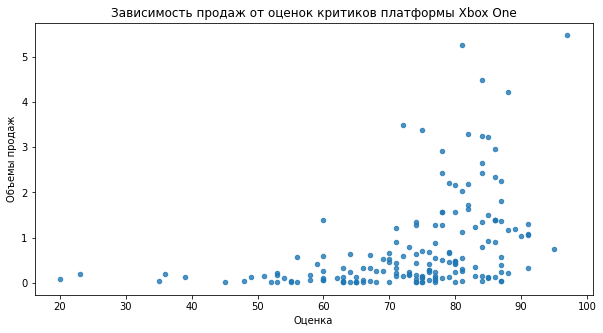

In [73]:
data_actualy_xone = data_actualy_critic.loc[data['platform'] == 'XOne']
data_actualy_xone.plot(x='critic_score', y='all_sales', kind = 'scatter', alpha=0.8, figsize=(10,5))
plt.xlabel('Оценка')
plt.ylabel('Объемы продаж')
plt.title('Зависимость продаж от оценок критиков платформы Xbox One');

In [74]:
data_actualy_xone[['all_sales', 'critic_score']].corr()

,all_sales,critic_score
all_sales,1.000000,0.416998
critic_score,0.416998,1.000000


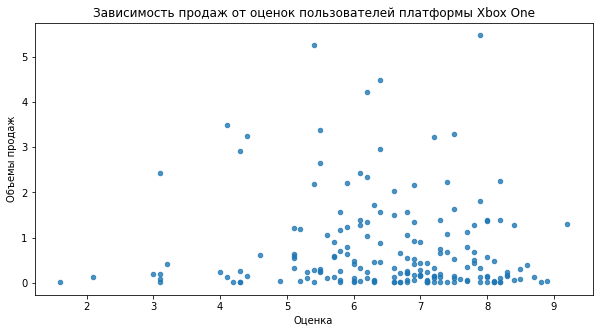

In [75]:
data_actualy_xone_user = data_actualy_user.loc[data['platform'] == 'XOne']
data_actualy_xone_user.plot(x='user_score', y='all_sales', kind = 'scatter', alpha=0.8, figsize=(10,5))
plt.xlabel('Оценка')
plt.ylabel('Объемы продаж')
plt.title('Зависимость продаж от оценок пользователей платформы Xbox One');

In [76]:
data_actualy_xone_user[['all_sales', 'user_score']].corr()

,all_sales,user_score
all_sales,1.000000,-0.068925
user_score,-0.068925,1.000000


In [77]:
data_actualy_user_other = data_actualy_user.loc[~data_actualy_user['platform'].isin(['PS4', 'PS3', 'PSV', '3DS', 'XOne'])]

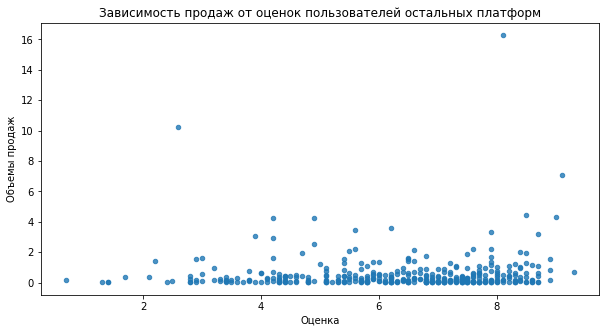

In [78]:
data_actualy_user_other.plot(x='user_score', y='all_sales', kind = 'scatter', alpha=0.8, figsize=(10,5))
plt.xlabel('Оценка')
plt.ylabel('Объемы продаж')
plt.title('Зависимость продаж от оценок пользователей остальных платформ');

In [79]:
data_actualy_user_other[['all_sales', 'user_score']].corr()

,all_sales,user_score
all_sales,1.000000,0.045487
user_score,0.045487,1.000000


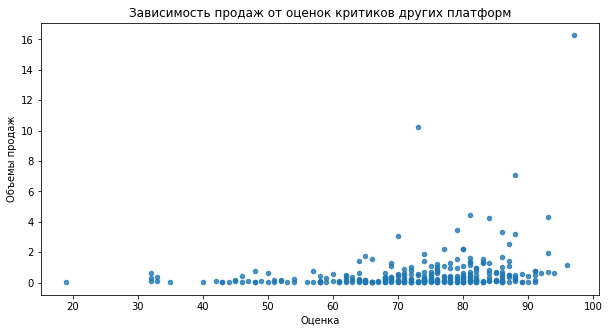

In [80]:
data_actualy_critic_other = data_actualy_critic.loc[~data_actualy_critic['platform'].isin(['PS4', 'PS3', 'PSV', '3DS', 'XOne'])]
data_actualy_critic_other.plot(x='critic_score', y='all_sales', kind = 'scatter', alpha=0.8, figsize=(10,5))
plt.xlabel('Оценка')
plt.ylabel('Объемы продаж')
plt.title('Зависимость продаж от оценок критиков других платформ');

In [81]:
data_actualy_critic_other[['all_sales', 'user_score']].corr()

,all_sales,user_score
all_sales,1.000000,0.067834
user_score,0.067834,1.000000


<div class="alert alert-info"><b>Комментарий студента:</b> Рассчитали и построили графики, чтобы посмотреть зависимость объемов продаж в разрезе платформ от оценок пользователя, корреляция объема продаж с оценками пользователей и критиков очень слабая, только корреляция оценок критиков по платформам Xbox One и PlayStasion 4 преодолевают порог коэффициента корреляции 0,4 (слабая взаимосвязь) </div>

## Шаг 4_Портрет пользователей по странам 

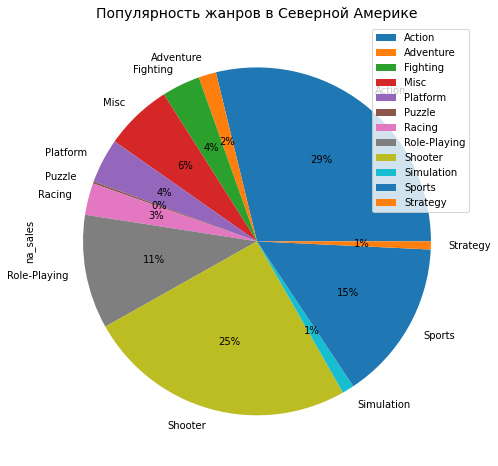

In [82]:
data_actualy.groupby(['genre']).sum().plot(kind='pie', y='na_sales', autopct='%1.0f%%', figsize=(16, 8))


plt.title('Популярность жанров в Северной Америке', fontsize=14);

Самые популярные жанры игр в Северной Америке: Action, Shooter, Sports, Role-Playing, Misc

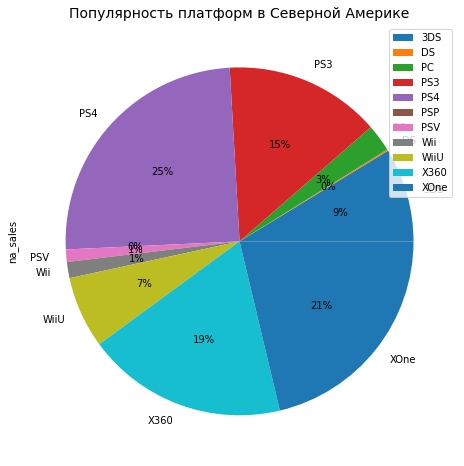

In [83]:
data_actualy.groupby(['platform']).sum().plot(kind='pie', y='na_sales', autopct='%1.0f%%', figsize=(16, 8))


plt.title('Популярность платформ в Северной Америке', fontsize=14);

Что касается игровых платформ, то рынок в Северной Америке почти поровну делят Play Station 4 и Xbox One, предыдущие версии PlayStation 3 и Xbox 360 чуть менее популярны.

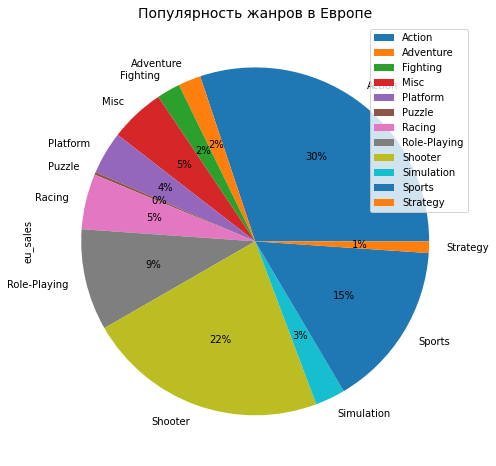

In [84]:
data_actualy.groupby(['genre']).sum().plot(kind='pie', y='eu_sales', autopct='%1.0f%%', figsize=(16, 8))


plt.title('Популярность жанров в Европе', fontsize=14);

Самые популярные жанры игр в Европе: Action, Shooter, Sports, Role-Playing, Misc/Racing, распределение очень похоже на показатели в Северной Америке

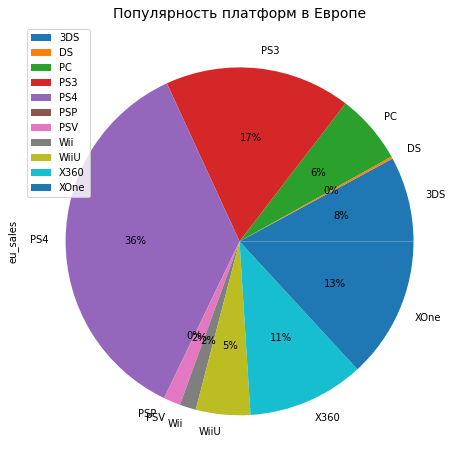

In [85]:
data_actualy.groupby(['platform']).sum().plot(kind='pie', y='eu_sales', autopct='%1.0f%%', figsize=(16, 8))


plt.title('Популярность платформ в Европе', fontsize=14);

Что касается игровых консолей, то лидером рынка в Европе является PlayStation 4

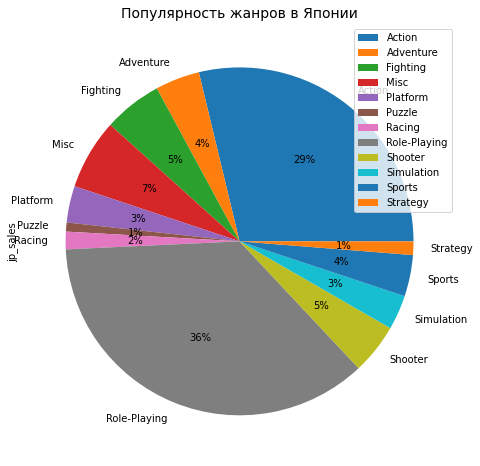

In [86]:
data_actualy.groupby(['genre']).sum().plot(kind='pie', y='jp_sales', autopct='%1.0f%%', figsize=(16, 8))


plt.title('Популярность жанров в Японии', fontsize=14);

Предпочтения пользователей из Японии очень отличается от остального мира, топ жанров в Японии выглядит так: Role-Playing, Action, Misc, Fighting/Shooter

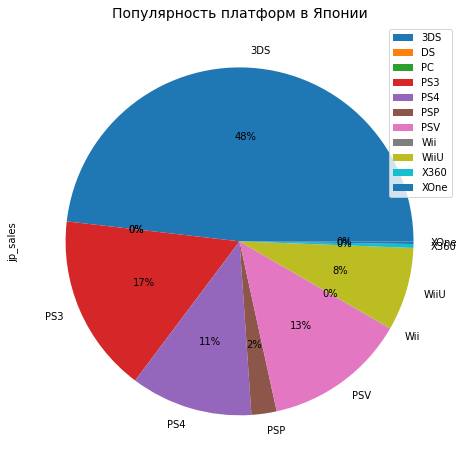

In [87]:
data_actualy.groupby(['platform']).sum().plot(kind='pie', y='jp_sales', autopct='%1.0f%%', figsize=(16, 8))


plt.title('Популярность платформ в Японии', fontsize=14);

Что касается игровых платформ, тут рынок тут рынок возглавляет игровая система 3DS от Nintendo, она даже опережает PlayStation от компании Sony, а Xbox от Microsoft рынок Японии не сумел завоевать

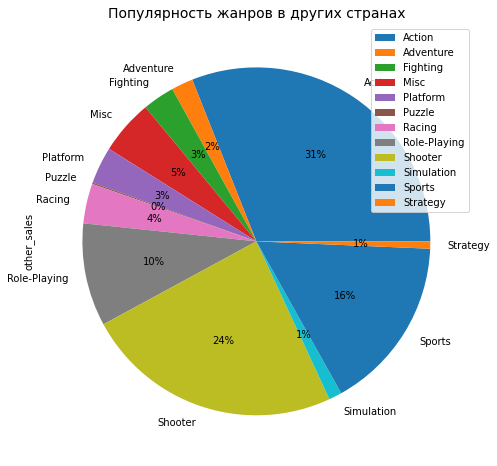

In [88]:
data_actualy.groupby(['genre']).sum().plot(kind='pie', y='other_sales', autopct='%1.0f%%', figsize=(16, 8))


plt.title('Популярность жанров в других странах', fontsize=14);

Самые популярные жанры игр в остальных странах: Action, Shooter, Sports, Role-Playing, Misc, как и в Северной Америке

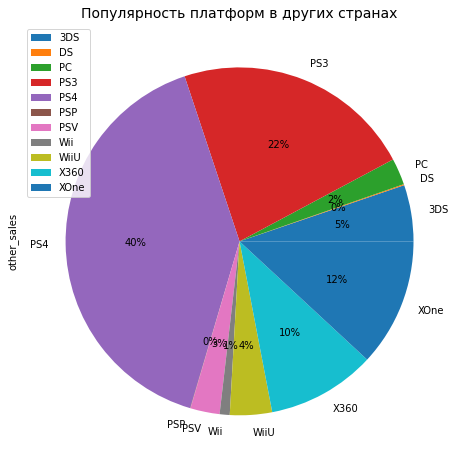

In [89]:
data_actualy.groupby(['platform']).sum().plot(kind='pie', y='other_sales', autopct='%1.0f%%', figsize=(16, 8))


plt.title('Популярность платформ в других странах', fontsize=14);

В остальном мире безоговорочным лидером по продажам является PlayStation

<div class="alert alert-info"><b>Комментарий студента:</b> Провели исследование популярности жанров и игровых платформ в разрезе регионов, выявили, что распределение популярности жанров игр в Северной Америке, Европе и остальном мире, кроме Японии примерно совпадает, топ-5 идентичны: Action, Shooter, Sports, Role-Playing, Misc, что касается игровых платформ, то рынок в Северной Америке почти поровну делят Play Station 4 и Xbox One, предыдущие версии PlayStation 3 и Xbox 360 чуть менее популярны, лидером рынка в Европе и остальном мире является PlayStation 4. Предпочтения пользователей из Японии очень отличается от остального мира, топ жанров в Японии выглядит так: Role-Playing, Action, Misc, Fighting/Shooter, Что касается игровых платформ, тут рынок тут рынок возглавляет игровая система 3DS от Nintendo, она даже опережает PlayStation от компании Sony, а Xbox от Microsoft рынок Японии не сумел завоевать.  </div>

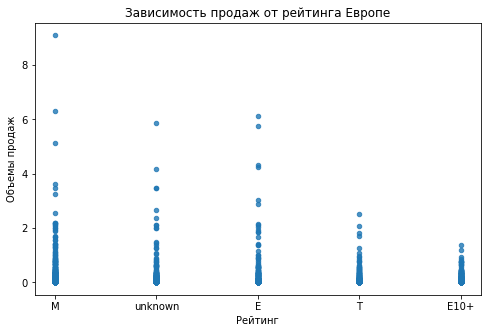

In [90]:
data_actualy.plot(x='rating', y='eu_sales', kind = 'scatter', alpha=0.8, figsize=(8,5))
plt.xlabel('Рейтинг')
plt.ylabel('Объемы продаж')
plt.title('Зависимость продаж от рейтинга Европе');

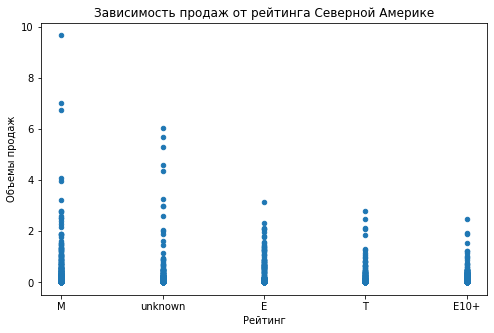

In [91]:
data_actualy.plot(x='rating', y='na_sales', kind = 'scatter', figsize=(8,5))
plt.xlabel('Рейтинг')
plt.ylabel('Объемы продаж')
plt.title('Зависимость продаж от рейтинга Северной Америке');

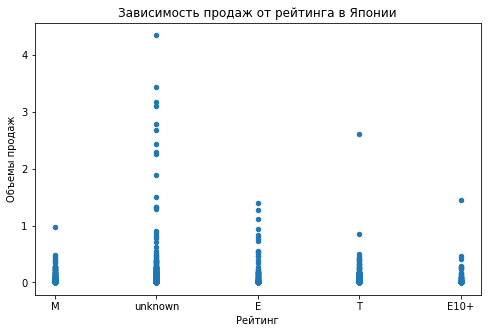

In [92]:
data_actualy.plot(x='rating', y='jp_sales', kind = 'scatter', figsize=(8,5))
plt.xlabel('Рейтинг')
plt.ylabel('Объемы продаж')
plt.title('Зависимость продаж от рейтинга в Японии');

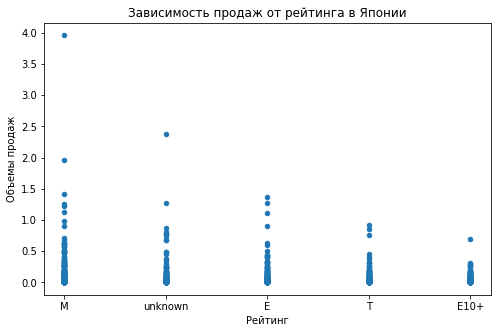

In [93]:
data_actualy.plot(x='rating', y='other_sales', kind = 'scatter', figsize=(8,5))
plt.xlabel('Рейтинг')
plt.ylabel('Объемы продаж')
plt.title('Зависимость продаж от рейтинга в Японии');

<div class="alert alert-info"><b>Комментарий студента:</b> Во всех странах, кроме Японии, самые высокие показатели продаж у игр с рейтингом М, а в Японии популярны игры с рейтингом Е </div>

## Шаг 5_Проверка гипотез 

In [94]:
data_actualy = data_actualy.loc[data['user_score'] != 0]
data_actualy.head(15)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales,platform_category
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05,play_station
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27,xbox
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62,play_station
60,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24,xbox
69,Call of Duty: Ghosts,PS3,2013,Shooter,4.10,3.63,0.38,1.25,71.0,2.6,M,9.36,play_station
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58,play_station
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66,play_station
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60,play_station
105,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87.0,6.5,M,7.17,play_station
110,Mario Kart 8,WiiU,2014,Racing,3.15,2.15,1.28,0.51,88.0,9.1,E,7.09,nintendo


In [95]:
data_pc = data_actualy.loc[data['platform'] == 'PC']

In [96]:
data_xone = data_actualy.loc[data['platform'] == 'XOne']

Проверяем гипотезу, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Нулевая гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые; Альтернативная гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC разные

In [97]:
alpha = 0.05 

results = st.ttest_ind(
    data_pc['user_score'], 
    data_xone['user_score'],
    alternative='greater') 

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.9299367079819418
Не получилось отвергнуть нулевую гипотезу


По итогам проверки гипотезы, получили результат, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Проверяем гипотезу, что средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные. Нулевая гипотеза: Средние пользовательские рейтинги одинаковые; Альтернативная гипотеза: Средние пользовательские рейтинги разные

In [98]:
action = data_actualy.loc[data['genre'] == 'Action']
sports = data_actualy.loc[data['genre'] == 'Sports']

alpha = 0.05 

results = st.ttest_ind(
    action['user_score'], 
    sports['user_score'],
    alternative='greater') 

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 5.2589161945700115e-28
Отвергаем нулевую гипотезу


По итогам проверки гипотезы, получили результат, что средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

## Шаг 6_Общие выводы 

В рамках проекта для интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры, были проанализированы из открытых источников исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. Поставлена задача выявить определяющие успешность игры закономерности.

По результатам анализа

Произвели проверку и обработку данных, посчитали суммарные продажи во всех регионах и записали их в отдельный столбец, обработали данные с рейтингом, который доступен только для Северной Америки и Канады
Проанализировали данные в разрезе наиболее популярных жанров, платформ, рассмотрели распределение по рейтингам и годам выпуска, в результате пришли к выводу, что для планирования продаж на 2017 год, нет необходимости анализировать данные за весь период, игровые консоли регулярно обновляются, многие из тех, что есть в датафрейме уже не выпускаются и для целей нашего анализа бесполезны, поэтому мы определили для нашей задачи актуальный период с 2013 по 2016 год, с этими данными и провели исследовательский анализ
Топ выпущенных игр по жанрам за актуальный период коррелируется с топом игр по оценкам пользователей
Так как у одних и тех же производителей за исследуемый период выходило несколько игровых систем, мы сгруппировали данные по производителям, чтобы результаты не рассеивались по платформам, так как количество доступных игр в актуальном периоде, скорее всего различаются только у производителей, т.к. есть игры, которые доступны только для PlayStation и нет на Xbox, при этом если игра выпускалась для PS3, для PS4 она также будет доступна
Выявили, что для PlayStation выпускается самое большое количество игр и соответственно это самый популярный производитель игровых систем в мире, с самым большим объемом продаж, при этом такой родоначальник игровых систем, как Nintendo отдал второе место по популярности, за последние годы Xbox от Microsoft
Провели исследование популярности жанров и игровых платформ в разрезе регионов, выявили, что распределение популярности жанров игр в Северной Америке, Европе и остальном мире, кроме Японии примерно совпадает, топ-5 идентичны: Action, Shooter, Sports, Role-Playing, Misc, что касается игровых платформ, то рынок в Северной Америке почти поровну делят Play Station 4 и Xbox One, предыдущие версии PlayStation 3 и Xbox 360 чуть менее популярны, лидером рынка в Европе и остальном мире является PlayStation 4. Предпочтения пользователей из Японии очень отличается от остального мира, топ жанров в Японии выглядит так: Role-Playing, Action, Misc, Fighting/Shooter, Что касается игровых платформ, тут рынок тут рынок возглавляет игровая система 3DS от Nintendo, она даже опережает PlayStation от компании Sony, а Xbox от Microsoft рынок Японии не сумел завоевать.
Произвели проверку гипотез и выявили, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые и что средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
Для интернет-магазина «Стримчик» приоритет для планирования продаж: игры для игровых платформ от PlayStation 4, PlayStation 3 и Xbox One, жанровые предпочтения: Shooter, Sports, Platform, Action.